# 1. Load libraries and datasets.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [57]:
train = pd.read_csv('datasets/Train.csv')
test = pd.read_csv('datasets/Test.csv')
ss = pd.read_csv('datasets/SampleSubmission.csv')
variable_data = pd.read_csv('datasets/variable_descriptions.csv')

In [58]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [59]:
variable_data.head()

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or bric...,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional d...,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apart...,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house...,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (se...,NaN,NaN


In [60]:
dw_cols = [cols for cols in train if cols.startswith('dw')]
psa_cols = [cols for cols in train if cols.startswith('psa')]
stv_cols = [cols for cols in train if cols.startswith('stv')]
car_cols = [cols for cols in train if cols.startswith('car')]
lln_cols = [cols for cols in train if cols.startswith('lln')]
lan_cols = [cols for cols in train if cols.startswith('lan')]
pg_cols = [cols for cols in train if cols.startswith('pg')]
pw_cols = [cols for cols in train if cols.startswith('pw')]

# 2. Exploratory Data Analysis.

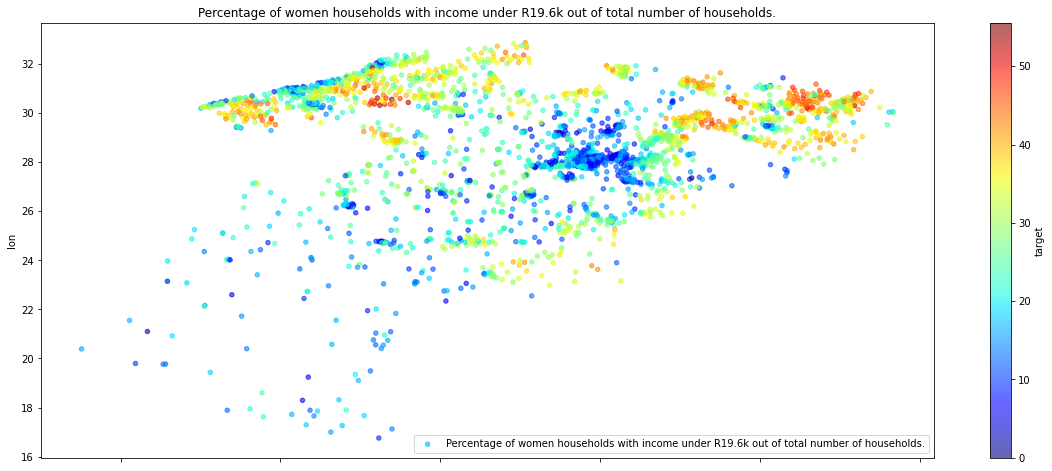

In [7]:
train.plot(kind = 'scatter', x = 'lat', y = 'lon', alpha = 0.6, label = 'Percentage of women households with income under R19.6k out of total number of households.',
           c = 'target', cmap = plt.get_cmap('jet'), colorbar = True,
           figsize = (20, 8))

plt.title('Percentage of women households with income under R19.6k out of total number of households.')
plt.legend()

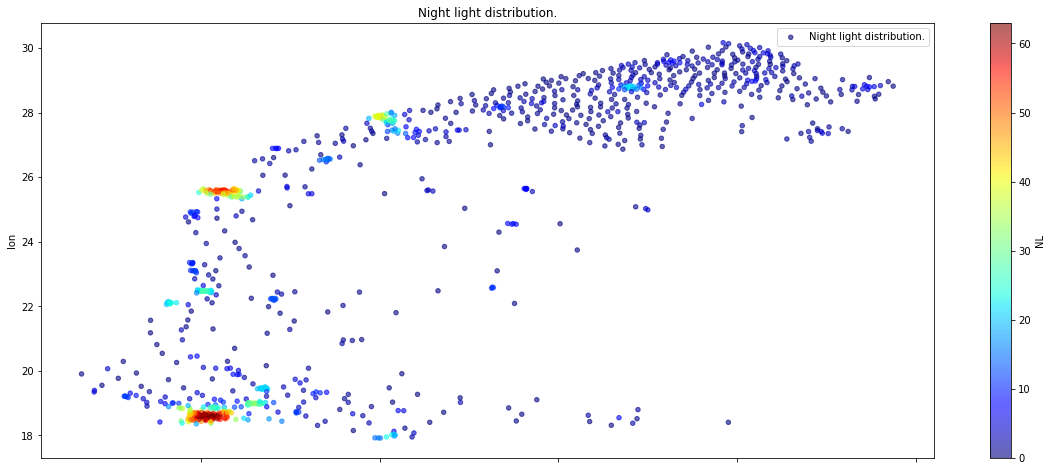

In [88]:
test.plot(kind = 'scatter', x = 'lat', y = 'lon', alpha = 0.6, label = 'Night light distribution.',
           c = 'NL', cmap = plt.get_cmap('jet'), colorbar = True,
           figsize = (20, 8))

plt.title('Night light distribution.')
plt.legend()

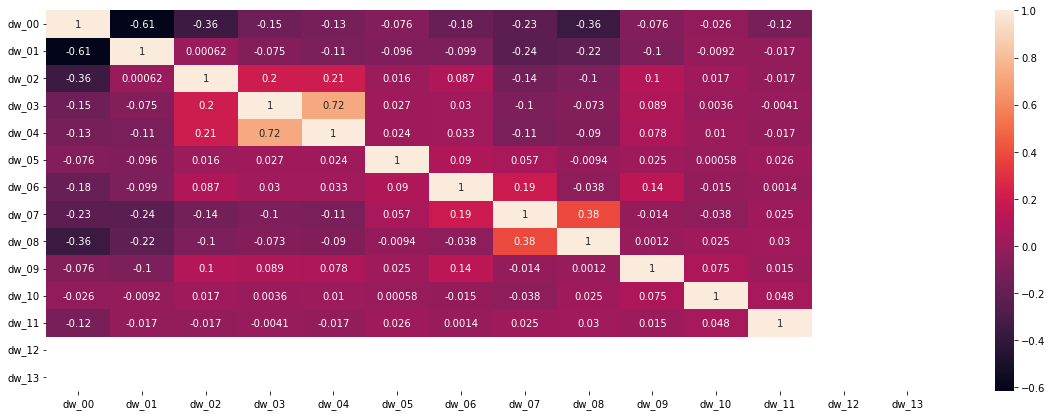

In [8]:
corr = train[dw_cols].corr()
plt.figure(figsize = (20, 7))
sns.heatmap(corr, annot = True)
plt.show()

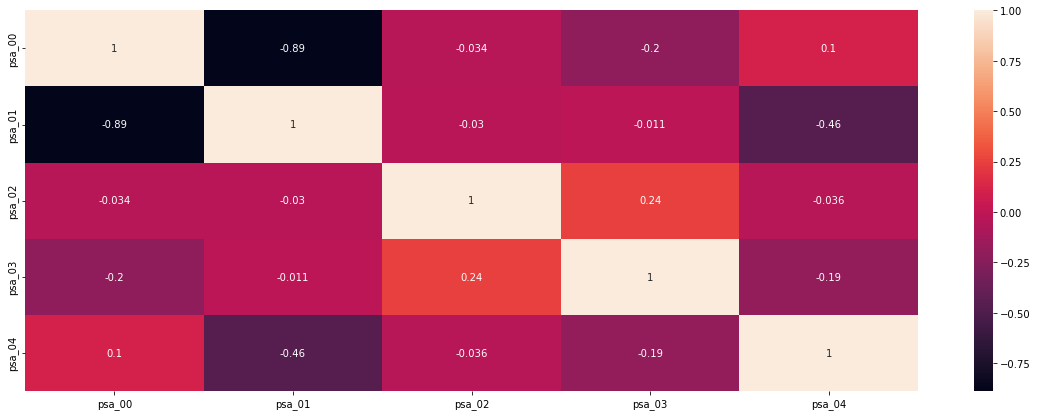

In [9]:
corr = train[psa_cols].corr()
plt.figure(figsize = (20, 7))
sns.heatmap(corr, annot = True)
plt.show()

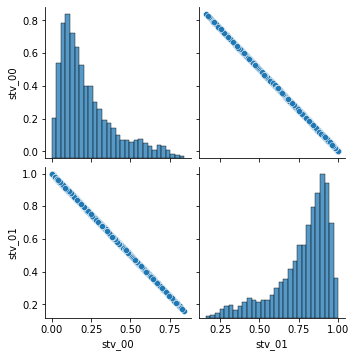

In [10]:
sns.pairplot(train[stv_cols])

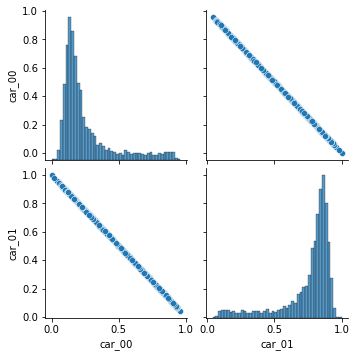

In [11]:
sns.pairplot(train[car_cols])

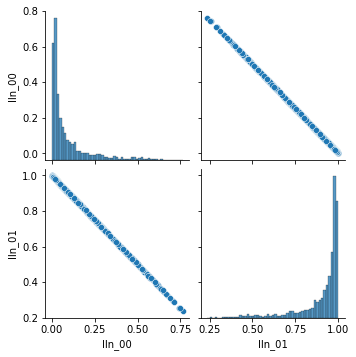

In [12]:
sns.pairplot(train[lln_cols])

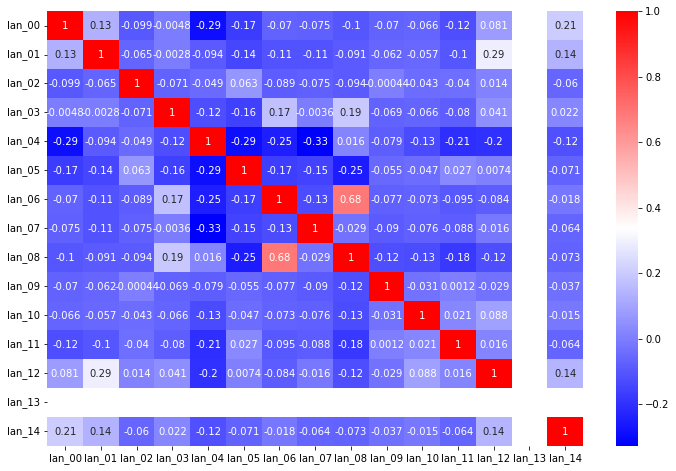

In [13]:
corr = train[lan_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap = 'bwr', annot = True)
plt.show()

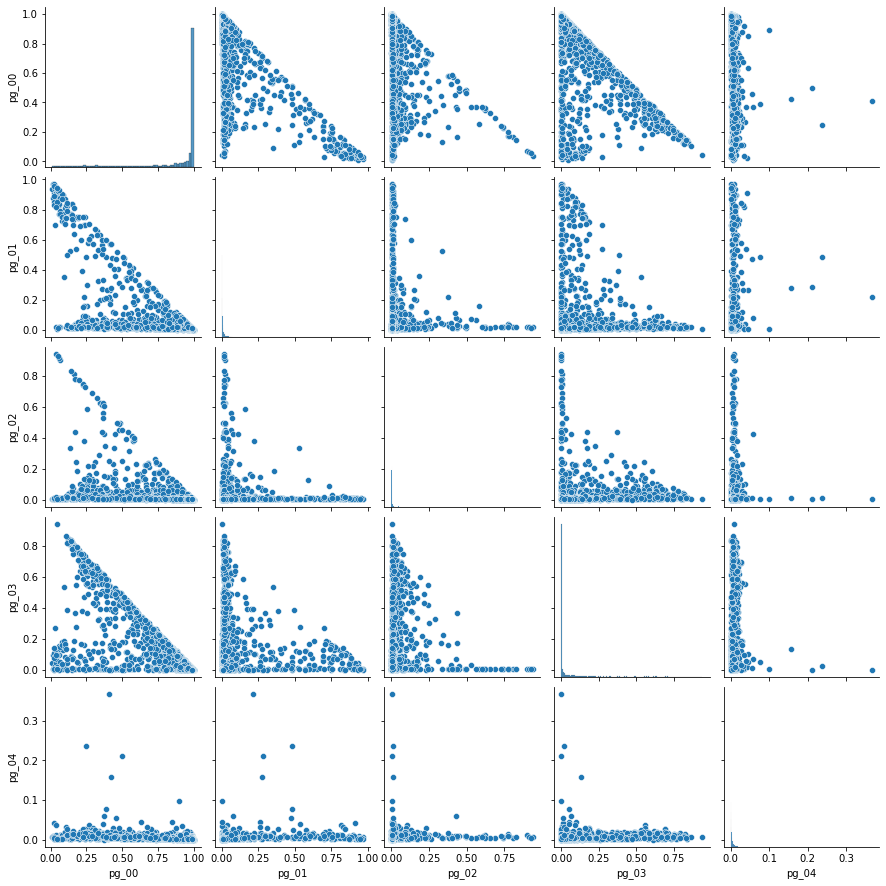

In [14]:
sns.pairplot(train[pg_cols])

<AxesSubplot:>

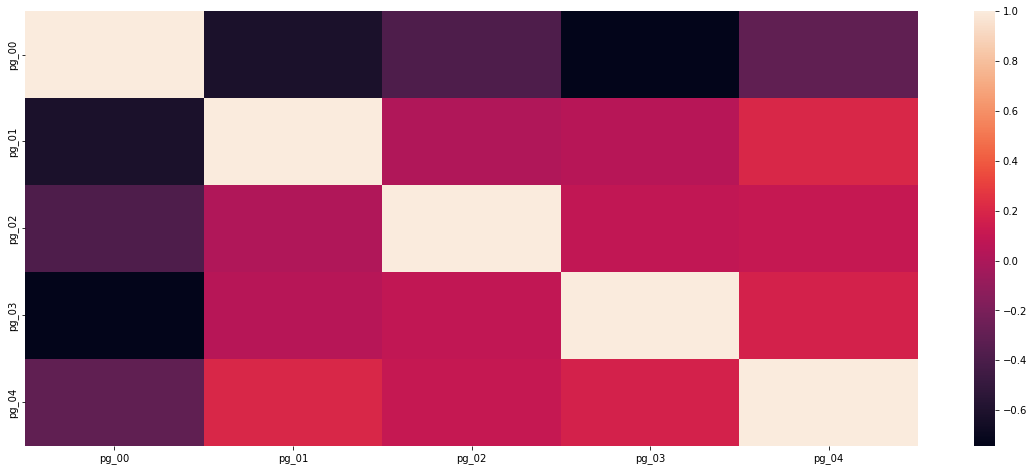

In [14]:
plt.figure(figsize = (20, 8))
sns.heatmap(train[pg_cols].corr())

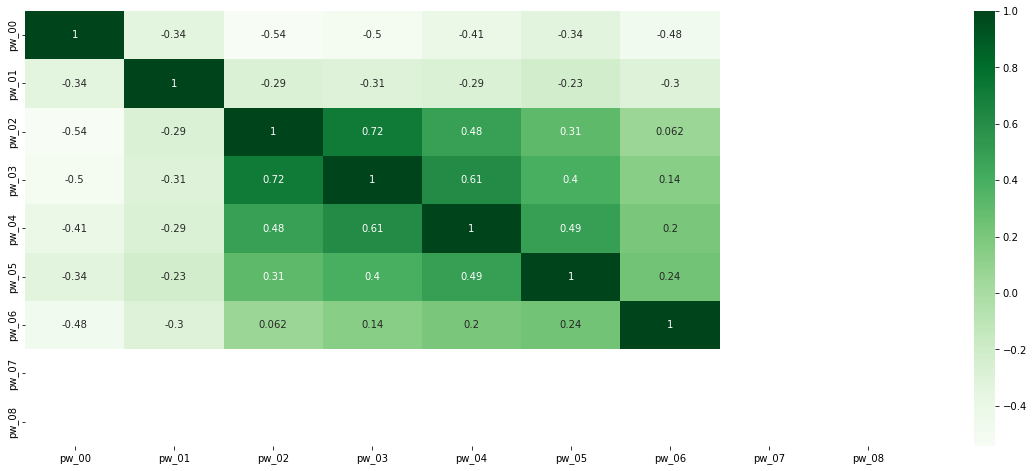

In [15]:
corr = train[pw_cols].corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr, annot = True, cmap = 'Greens')
plt.show()

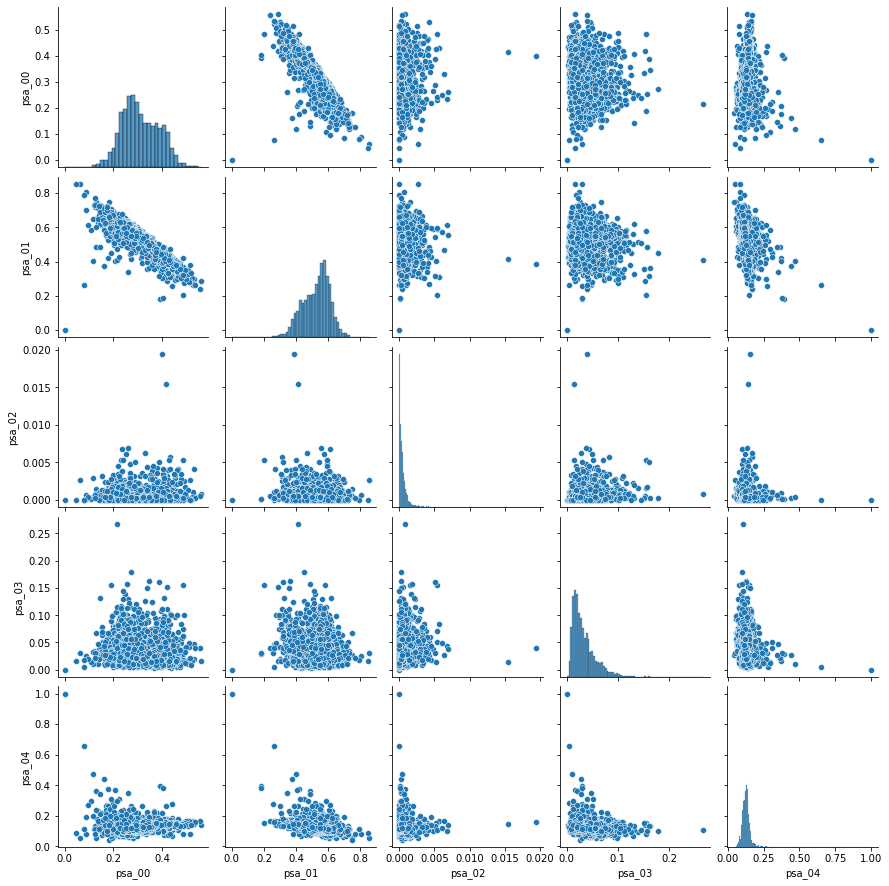

In [17]:
sns.pairplot(train[psa_cols])

<AxesSubplot:>

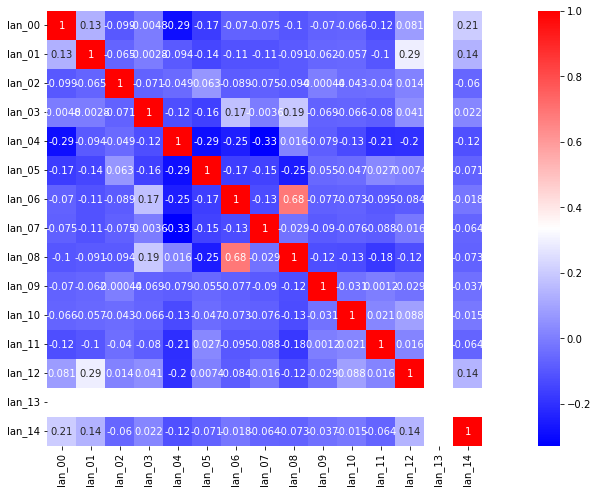

In [16]:
corr = train[lan_cols].corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr, cmap = 'bwr', annot = True, square = True, linecolor = 'black')

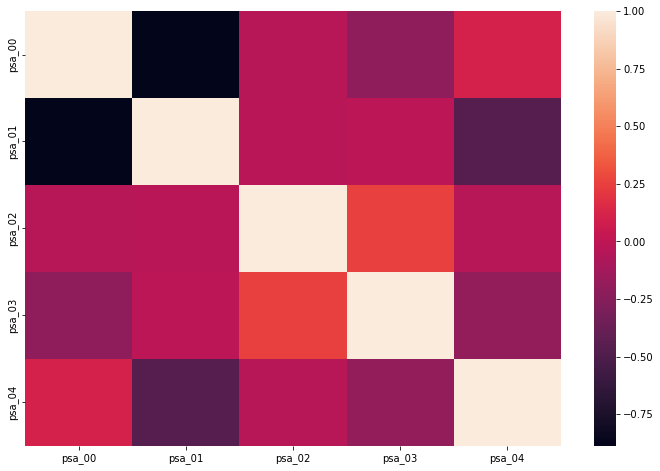

In [17]:
corr = train[psa_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr)
plt.show()

# 3. Feature engineering.

In [75]:
#Make a copy of the train and test sets.
copied_train = train.copy()
copied_test = test.copy()

In [76]:
#Filter wards.
PATTERN = r'[\d\s]+:'

for dataset in (copied_train, copied_test):
    dataset['ward_category'] = dataset['ward'].str.replace(PATTERN, '', regex = True)

In [77]:
#Implement data transformation steps.
categorical_cols = [cols for cols in copied_train.columns if copied_train[cols].dtype == 'object']
numerical_cols = [cols for cols in copied_train.columns if copied_train[cols].dtype in ['int', 'float']]

categorical_cols

['ward', 'ADM4_PCODE', 'ward_category']

In [78]:
#Preprocessing categorical data.
encoder = OrdinalEncoder(handle_unknown= 'error')

#Encode categorical columns.
copied_train[categorical_cols] = encoder.fit_transform(copied_train[categorical_cols])
copied_test[categorical_cols] = encoder.fit_transform(copied_test[categorical_cols])

In [79]:
features = ['total_households', 'total_individuals', 'ward_category']

#Set cluster features to 13.
kmeans = MiniBatchKMeans(n_clusters = 13, random_state = 42)

# Merge columns with high correlation.
for dataset in (copied_train, copied_test):

    dataset['sum_of_stv_cols'] = dataset[stv_cols].sum(axis = 1)

    dataset['sum_of_car_cols'] = dataset[car_cols].sum(axis = 1)

    dataset['sum_of_lln_cols'] = dataset[lln_cols].sum(axis = 1)
    
    dataset['sum_of_dw_cols ']= dataset[dw_cols].sum(axis = 1)
    
    #dataset['Clusters'] = kmeans.fit_predict(dataset[features])

In [80]:
cols_to_drop = ['ADM4_PCODE', 'stv_01', 'lln_01', 'car_01','dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'lan_13', 'psa_00']

In [81]:
copied_train = copied_train.drop(cols_to_drop, axis = 1)
X = copied_train.drop('target', axis = 1)
y = copied_train.target
X.shape, y.shape

((2822, 54), (2822,))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 420)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2116, 54), (706, 54), (2116,), (706,))

In [85]:
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
predictions = model.predict(X_test)
mse = mean_squared_error(predictions, y_test)
print(mse)

11.933508764827861


In [73]:
copied_test = copied_test.drop(cols_to_drop, axis = 1)
copied_test.shape

(1013, 55)

In [74]:
predictions = model.predict(copied_test)

In [20]:
sub_file = ss.copy()
sub_file['target'] = predictions

In [21]:
#sub_file.to_csv('submissions/46th_submission.csv', index = False)

In [48]:
feats = copied_train.drop('target', axis = 1)
corr_matrix = feats.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

#Columns with highly correlated features. (r > 0.6)
to_drop = [col for col in feats.columns if any (feats[col] >  0.99)]
to_drop

['ward',
 'total_households',
 'total_individuals',
 'dw_11',
 'psa_04',
 'lan_11',
 'lan_14',
 'pg_00',
 'lgt_00',
 'pw_00',
 'pw_02',
 'lon',
 'NL',
 'ward_category',
 'sum_of_stv_cols',
 'sum_of_car_cols',
 'sum_of_lln_cols',
 'sum_of_dw_cols ',
 'Clusters']

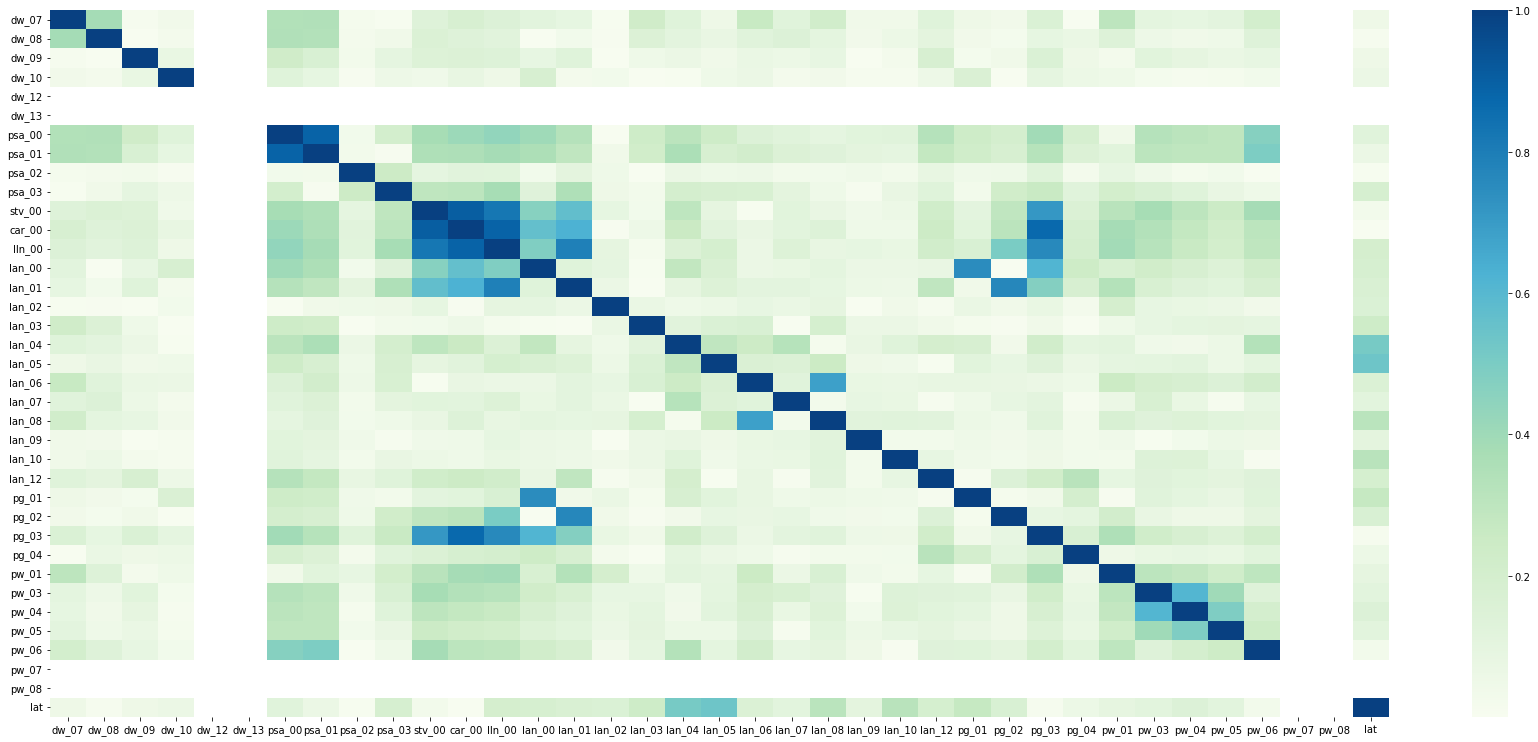

In [56]:
corr = feats.drop(to_drop, axis = 1).corr().abs()
plt.figure(figsize = (30, 13))
sns.heatmap(corr, cmap = 'GnBu')
plt.show()

In [37]:
label_train = copied_train.copy()
label_train = label_train.drop(to_drop, columns = 1)
label_train

ValueError: Cannot specify both 'labels' and 'index'/'columns'